# Bitcoin Pricd Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Bitcoin = pd.read_csv(r"E:\Internship Jan\Bitcoin Price Predictio.csv")

In [3]:
df = Bitcoin.copy()

In [4]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [5]:
df.tail()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
2901,1/27/2018,11524.77667,16830312.5,1.940000e+11,7.630946e+08,153844.0759,1.038548,0,1232.980892,11.600,...,1.778601,126.855696,541699,193578,295802277,188058,126082,1363301.068,119799.4611,1.380662e+09
2902,1/28/2018,11765.71000,16832287.5,1.980000e+11,7.381042e+08,154006.9753,1.031009,0,1350.924051,11.950,...,1.302242,117.430262,492738,213446,296015723,205967,137919,3128906.096,163590.5694,1.924759e+09
2903,1/29/2018,11212.65500,16834137.5,1.890000e+11,6.111197e+08,154157.6651,1.018174,0,1568.756757,12.275,...,1.243012,96.382352,532630,232176,296247899,225983,155772,1941048.853,160557.7065,1.800278e+09
2904,1/30/2018,10184.06167,16836225.0,1.710000e+11,1.266284e+09,154322.5790,0.987509,0,1416.820359,11.075,...,1.301143,96.749249,531440,236609,296484508,230310,158259,2359671.266,172755.8071,1.759356e+09
2905,1/31/2018,10125.01333,16837687.5,1.700000e+11,9.332398e+08,154444.5903,1.042831,0,1745.948718,15.675,...,1.016284,80.529148,481100,204276,296688784,197264,141543,1785708.486,159867.3306,1.618659e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [7]:
nRows, nCols = df.shape

In [8]:
print(f"There are {nRows} rows and {nCols} columns in the dataset.")

There are 2906 rows and 24 columns in the dataset.


## Column name Standardization

In [9]:
#df.columns

In [10]:
# Capitalizing the columns

df.columns = map(str.capitalize, df.columns)

In [11]:
df.columns

Index(['Date', 'Btc_market_price', 'Btc_total_bitcoins', 'Btc_market_cap',
       'Btc_trade_volume', 'Btc_blocks_size', 'Btc_avg_block_size',
       'Btc_n_orphaned_blocks', 'Btc_n_transactions_per_block',
       'Btc_median_confirmation_time', 'Btc_hash_rate', 'Btc_difficulty',
       'Btc_miners_revenue', 'Btc_transaction_fees',
       'Btc_cost_per_transaction_percent', 'Btc_cost_per_transaction',
       'Btc_n_unique_addresses', 'Btc_n_transactions',
       'Btc_n_transactions_total', 'Btc_n_transactions_excluding_popular',
       'Btc_n_transactions_excluding_chains_longer_than_100',
       'Btc_output_volume', 'Btc_estimated_transaction_volume',
       'Btc_estimated_transaction_volume_usd'],
      dtype='object')

***----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

***What's the 1024th value in the column 'btc_market_price'? Since in python lists the index starts from 0, we have to consider 1025th value***

In [12]:
df['Btc_market_price'][1023]

13.6888

In [13]:
len(df['Btc_market_price'])

2906

***Which feature shows the perfect corelation with the 'btc_market_price' i,e has a pearson equal to 1?***

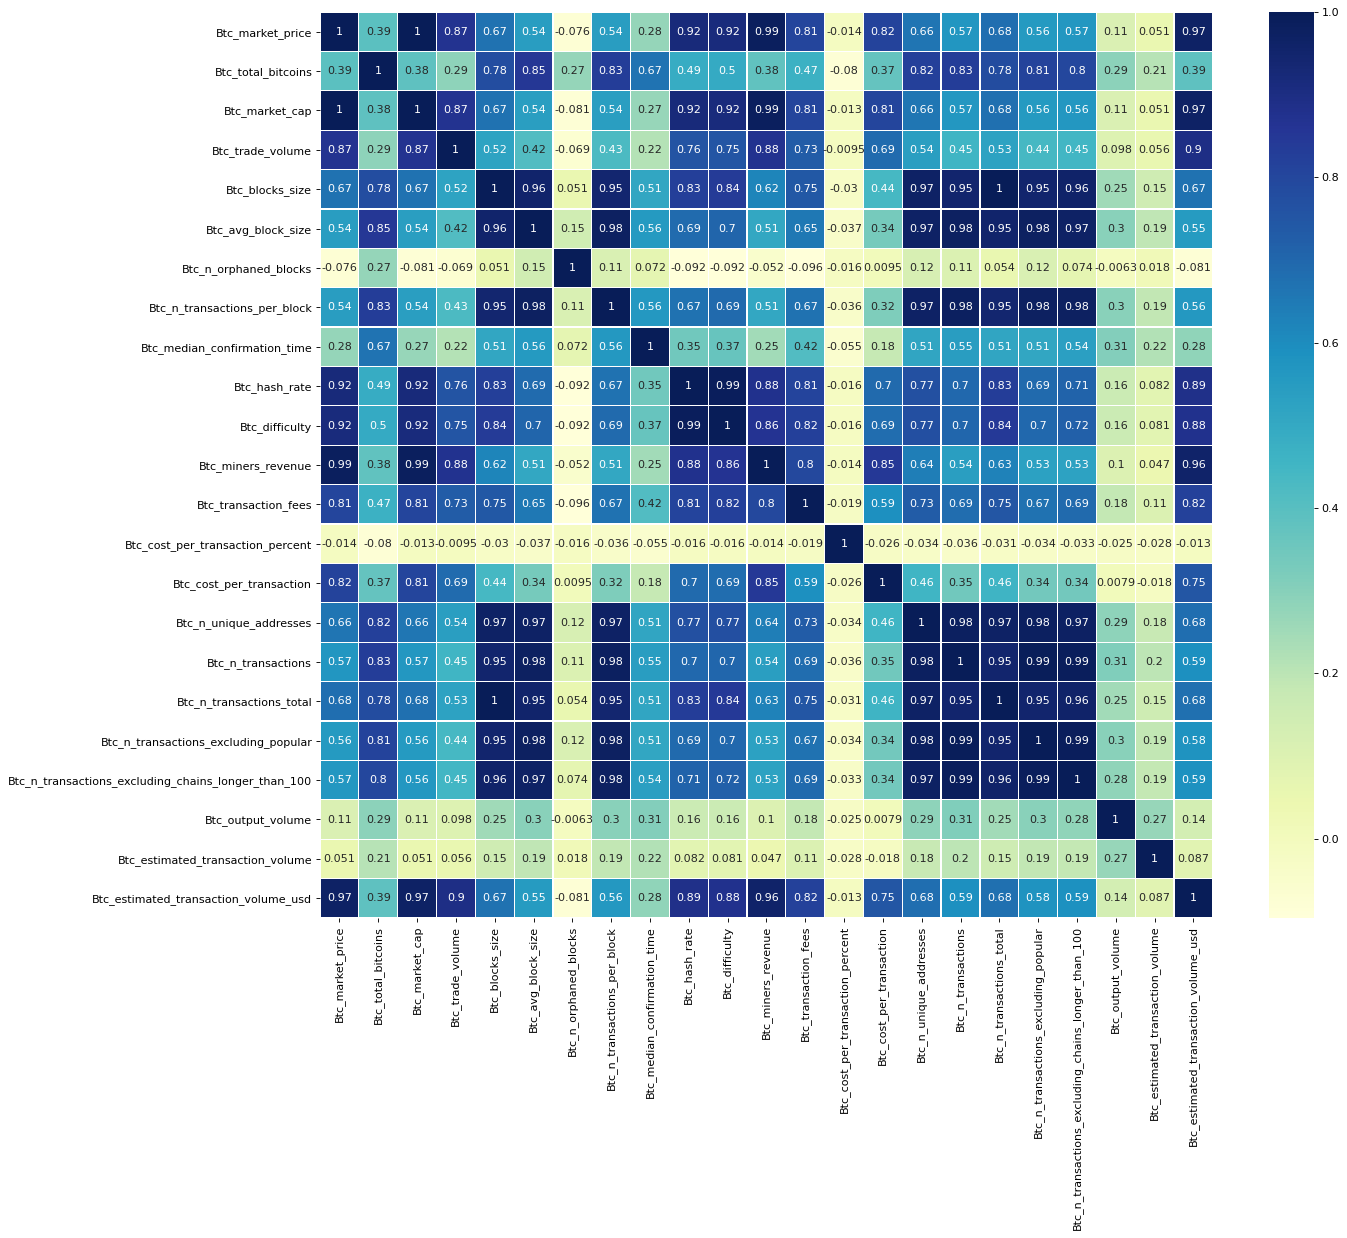

In [14]:
plt.figure(figsize= (18,15), dpi=80)
sns.heatmap(df.corr(), annot= True, annot_kws= {'size':10}, linewidths= 0.2, cmap= 'YlGnBu')
plt.show()

In [15]:
# Here Btc_market_cap shows the perfect corelation with the 'btc_market_price' i,e has a pearson equal to 1

***what function in pandas allows you to fill cells in column that have nan values***

In [16]:
# fillna()

***----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

## Converting the Date column to Date Format

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Date                                                 2906 non-null   datetime64[ns]
 1   Btc_market_price                                     2906 non-null   float64       
 2   Btc_total_bitcoins                                   2879 non-null   float64       
 3   Btc_market_cap                                       2906 non-null   float64       
 4   Btc_trade_volume                                     2885 non-null   float64       
 5   Btc_blocks_size                                      2877 non-null   float64       
 6   Btc_avg_block_size                                   2906 non-null   float64       
 7   Btc_n_orphaned_blocks                                2906 non-null   int64         
 8 

In [19]:
df.dtypes

Date                                                   datetime64[ns]
Btc_market_price                                              float64
Btc_total_bitcoins                                            float64
Btc_market_cap                                                float64
Btc_trade_volume                                              float64
Btc_blocks_size                                               float64
Btc_avg_block_size                                            float64
Btc_n_orphaned_blocks                                           int64
Btc_n_transactions_per_block                                  float64
Btc_median_confirmation_time                                  float64
Btc_hash_rate                                                 float64
Btc_difficulty                                                float64
Btc_miners_revenue                                            float64
Btc_transaction_fees                                          float64
Btc_cost_per_transac

    The Date column is converted back to Date format

## Descriptive Statistics 

In [20]:
df.describe()

,Btc_market_price,Btc_total_bitcoins,Btc_market_cap,Btc_trade_volume,Btc_blocks_size,Btc_avg_block_size,Btc_n_orphaned_blocks,Btc_n_transactions_per_block,Btc_median_confirmation_time,Btc_hash_rate,...,Btc_cost_per_transaction_percent,Btc_cost_per_transaction,Btc_n_unique_addresses,Btc_n_transactions,Btc_n_transactions_total,Btc_n_transactions_excluding_popular,Btc_n_transactions_excluding_chains_longer_than_100,Btc_output_volume,Btc_estimated_transaction_volume,Btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


***The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.***

    Here we can confirm that there are null values in Btc_total_bitcoins, Btc_market_cap, Btc_trade_volume, Btc_blocks_size

## Duplicated values

In [21]:
df.duplicated().sum()

0

    There are no duplicated values in the dataset.

## Null values

In [22]:
df.isnull().sum()

Date                                                    0
Btc_market_price                                        0
Btc_total_bitcoins                                     27
Btc_market_cap                                          0
Btc_trade_volume                                       21
Btc_blocks_size                                        29
Btc_avg_block_size                                      0
Btc_n_orphaned_blocks                                   0
Btc_n_transactions_per_block                            0
Btc_median_confirmation_time                           12
Btc_hash_rate                                           0
Btc_difficulty                                         16
Btc_miners_revenue                                      0
Btc_transaction_fees                                   10
Btc_cost_per_transaction_percent                        0
Btc_cost_per_transaction                                0
Btc_n_unique_addresses                                  0
Btc_n_transact

In [23]:
# Total null values is 

df.isnull().sum().sum()

115

In [24]:
# Percentage of missing values in the dataset

null_value_perc = round(df.isnull().sum().sum()/np.product(df.shape)*100,2)

null_value_perc

0.16

In [25]:
# Other method to view the missing value percentage in each columns

df.isnull().sum()/np.product(df.shape)

Date                                                   0.000000
Btc_market_price                                       0.000000
Btc_total_bitcoins                                     0.000387
Btc_market_cap                                         0.000000
Btc_trade_volume                                       0.000301
Btc_blocks_size                                        0.000416
Btc_avg_block_size                                     0.000000
Btc_n_orphaned_blocks                                  0.000000
Btc_n_transactions_per_block                           0.000000
Btc_median_confirmation_time                           0.000172
Btc_hash_rate                                          0.000000
Btc_difficulty                                         0.000229
Btc_miners_revenue                                     0.000000
Btc_transaction_fees                                   0.000143
Btc_cost_per_transaction_percent                       0.000000
Btc_cost_per_transaction                

In [26]:
# count() is used to count the number of rows in each column

df.count()

Date                                                   2906
Btc_market_price                                       2906
Btc_total_bitcoins                                     2879
Btc_market_cap                                         2906
Btc_trade_volume                                       2885
Btc_blocks_size                                        2877
Btc_avg_block_size                                     2906
Btc_n_orphaned_blocks                                  2906
Btc_n_transactions_per_block                           2906
Btc_median_confirmation_time                           2894
Btc_hash_rate                                          2906
Btc_difficulty                                         2890
Btc_miners_revenue                                     2906
Btc_transaction_fees                                   2896
Btc_cost_per_transaction_percent                       2906
Btc_cost_per_transaction                               2906
Btc_n_unique_addresses                  

In [27]:
# Lets add all the missing columns into a new list

missing_columns = [col for col in df.columns if df[col].isnull().any()]

missing_columns

['Btc_total_bitcoins',
 'Btc_trade_volume',
 'Btc_blocks_size',
 'Btc_median_confirmation_time',
 'Btc_difficulty',
 'Btc_transaction_fees']

In [28]:
# Since the missing value percentage is less lets fill the missing values with column mean

df[df['Btc_total_bitcoins'].isnull()].head()

,Date,Btc_market_price,Btc_total_bitcoins,Btc_market_cap,Btc_trade_volume,Btc_blocks_size,Btc_avg_block_size,Btc_n_orphaned_blocks,Btc_n_transactions_per_block,Btc_median_confirmation_time,...,Btc_cost_per_transaction_percent,Btc_cost_per_transaction,Btc_n_unique_addresses,Btc_n_transactions,Btc_n_transactions_total,Btc_n_transactions_excluding_popular,Btc_n_transactions_excluding_chains_longer_than_100,Btc_output_volume,Btc_estimated_transaction_volume,Btc_estimated_transaction_volume_usd
371,2011-02-23,0.950000,NaN,5224192.500,6046.9830,10.0,0.003094,0,11.0,0.0,...,43.965953,4.821429,3480,2394,289526,2394,1461,524405.1333,27635.0,26253.0
372,2011-02-24,0.949900,NaN,5233806.515,12747.7555,10.0,0.002851,0,12.0,0.0,...,32.802023,5.193628,2847,1957,291483,1957,1294,219771.5677,32620.0,30986.0
373,2011-02-25,1.000000,NaN,5520950.000,4282.6176,10.0,0.002908,0,17.0,0.0,...,34.808034,5.201500,3067,2134,293617,2134,1502,204983.1092,31889.0,31889.0
374,2011-02-26,0.988567,NaN,5470235.495,4459.7454,10.0,0.002510,0,16.0,0.0,...,23.695206,6.316963,2901,1964,295581,1964,1292,187552.7905,52964.0,52359.0
375,2011-02-27,0.960000,NaN,5325168.000,21639.9375,10.0,0.002615,0,10.0,0.0,...,16.664982,5.753207,3198,2261,297842,2261,1580,203856.7486,81308.0,78056.0


## imputing missing values

In [29]:
for col in df[missing_columns]:
    df[col] = df[col].fillna(df[col].mean())

In [30]:
df.isnull().sum()

Date                                                   0
Btc_market_price                                       0
Btc_total_bitcoins                                     0
Btc_market_cap                                         0
Btc_trade_volume                                       0
Btc_blocks_size                                        0
Btc_avg_block_size                                     0
Btc_n_orphaned_blocks                                  0
Btc_n_transactions_per_block                           0
Btc_median_confirmation_time                           0
Btc_hash_rate                                          0
Btc_difficulty                                         0
Btc_miners_revenue                                     0
Btc_transaction_fees                                   0
Btc_cost_per_transaction_percent                       0
Btc_cost_per_transaction                               0
Btc_n_unique_addresses                                 0
Btc_n_transactions             

***The null values in each column are filled with column mean***

## Exploratory Data Analysis on the dataset

In [31]:
df.skew()

Btc_market_price                                        4.967418
Btc_total_bitcoins                                     -0.627751
Btc_market_cap                                          4.999365
Btc_trade_volume                                        8.250385
Btc_blocks_size                                         1.202567
Btc_avg_block_size                                      0.717729
Btc_n_orphaned_blocks                                   2.797799
Btc_n_transactions_per_block                            0.882667
Btc_median_confirmation_time                            0.217002
Btc_hash_rate                                           3.599421
Btc_difficulty                                          3.447605
Btc_miners_revenue                                      5.545830
Btc_transaction_fees                                    4.156163
Btc_cost_per_transaction_percent                       45.343540
Btc_cost_per_transaction                                3.306804
Btc_n_unique_addresses   

***By the above output we can confirm all the columns are positively skewed excluding Btc_total_bitcoins***

## Lets view how the values are distributed in one shot

In [32]:
import warnings
warnings.filterwarnings('ignore')

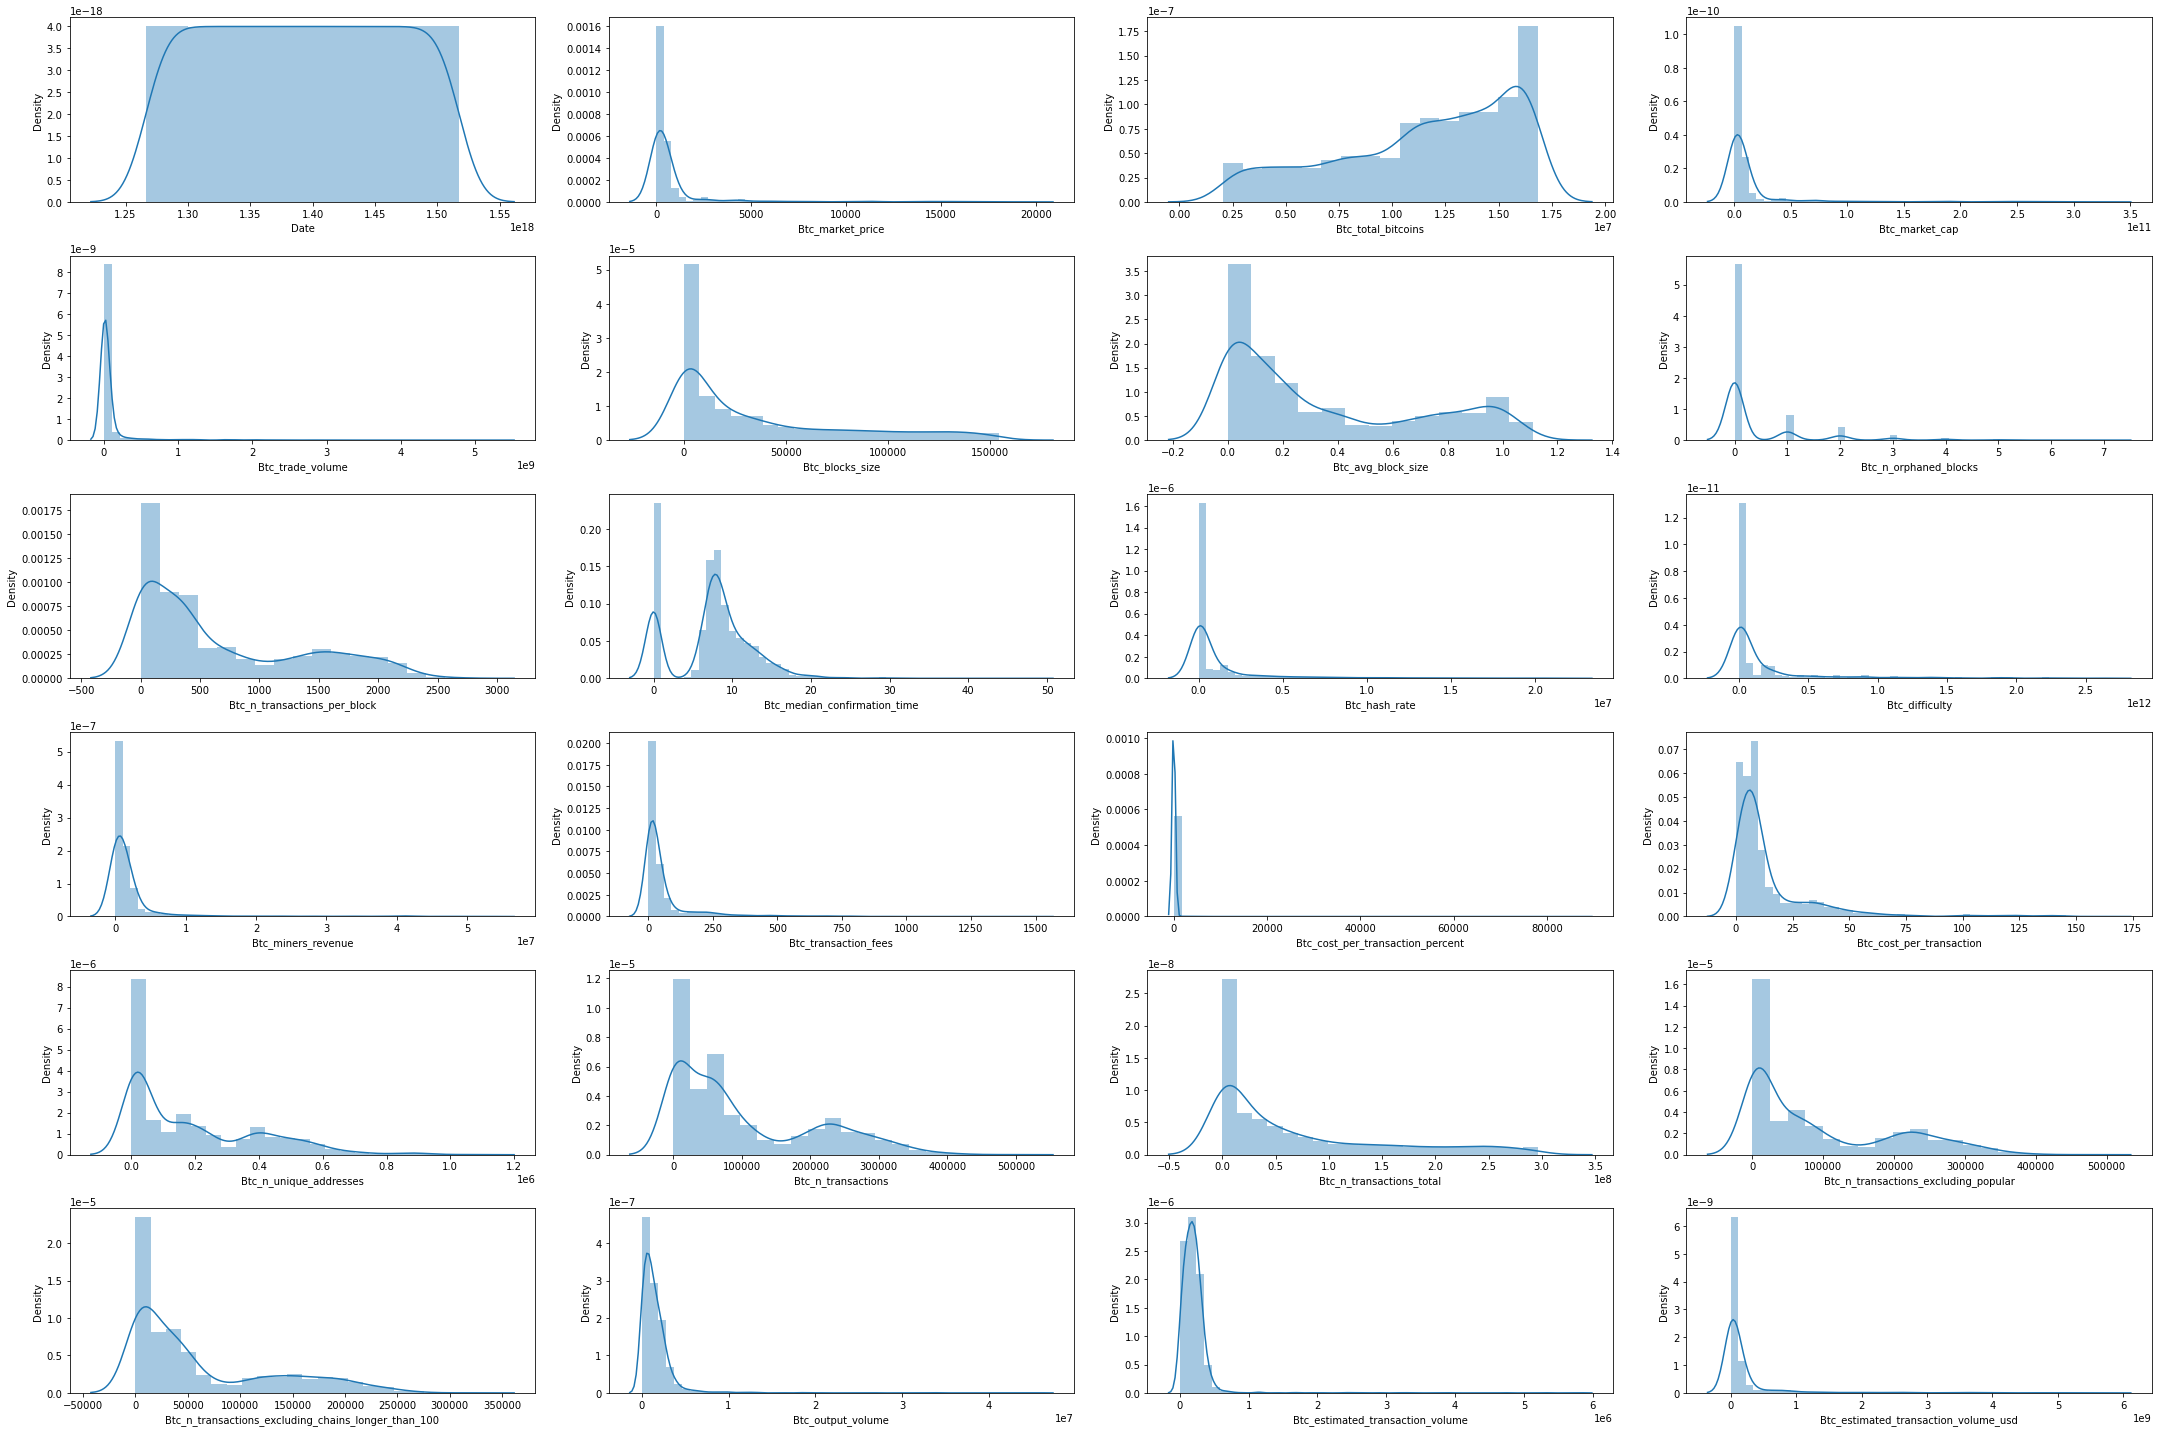

In [33]:
rows = 6
cols = 4

fig, ax = plt.subplots(nrows= rows, ncols=cols, figsize = (30,20))

col = df.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]], ax= ax[i][j])
        index = index + 1
        
plt.tight_layout()

## Viewing each columns seperately

<AxesSubplot:>

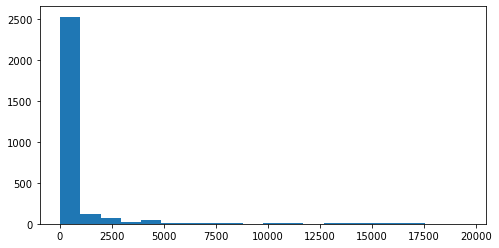

In [34]:
df['Btc_market_price'].hist(bins= 20, figsize = (8,4), grid= False)

<AxesSubplot:>

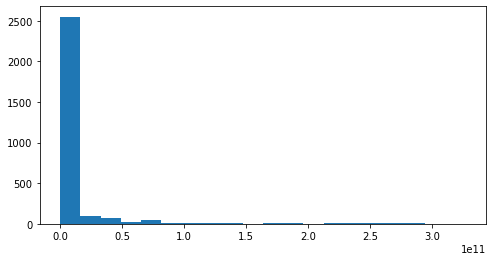

In [35]:
df['Btc_market_cap'].hist(bins= 20, figsize = (8,4), grid= False)

<Figure size 576x288 with 0 Axes>

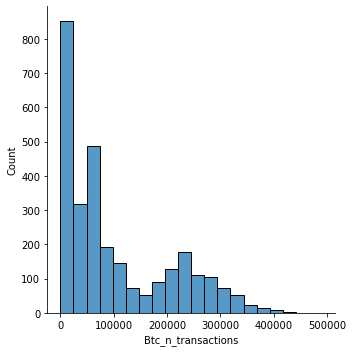

In [36]:
plt.figure(figsize= (8,4))
sns.displot(df['Btc_n_transactions'] , kde=False)
plt.show()

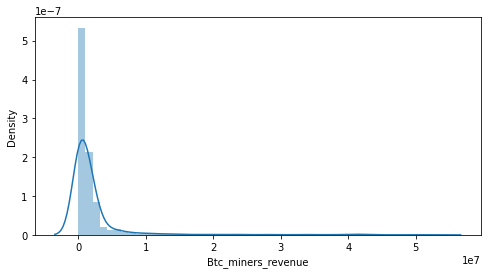

In [37]:
plt.figure(figsize= (8,4))
sns.distplot(df['Btc_miners_revenue'])
plt.show()

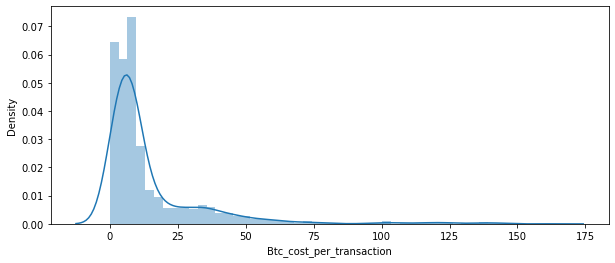

In [38]:
plt.figure(figsize= (10,4))
sns.distplot(df['Btc_cost_per_transaction'])
plt.show()

<Figure size 720x288 with 0 Axes>

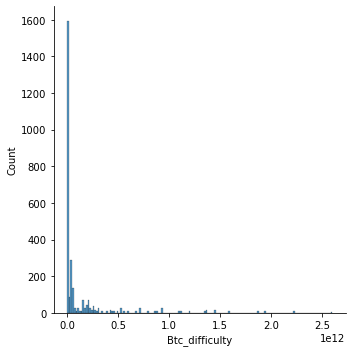

In [39]:
plt.figure(figsize=(10,4))
sns.displot(df['Btc_difficulty'])
plt.show()

<Figure size 720x288 with 0 Axes>

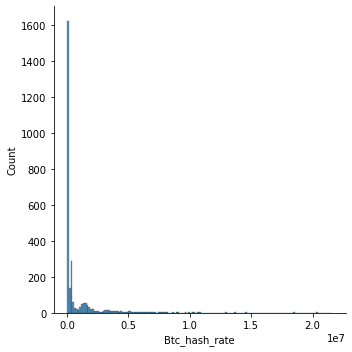

In [40]:
plt.figure(figsize=(10,4))
sns.displot(df['Btc_hash_rate'])
plt.show()

## Outliers

In [41]:
df.columns

Index(['Date', 'Btc_market_price', 'Btc_total_bitcoins', 'Btc_market_cap',
       'Btc_trade_volume', 'Btc_blocks_size', 'Btc_avg_block_size',
       'Btc_n_orphaned_blocks', 'Btc_n_transactions_per_block',
       'Btc_median_confirmation_time', 'Btc_hash_rate', 'Btc_difficulty',
       'Btc_miners_revenue', 'Btc_transaction_fees',
       'Btc_cost_per_transaction_percent', 'Btc_cost_per_transaction',
       'Btc_n_unique_addresses', 'Btc_n_transactions',
       'Btc_n_transactions_total', 'Btc_n_transactions_excluding_popular',
       'Btc_n_transactions_excluding_chains_longer_than_100',
       'Btc_output_volume', 'Btc_estimated_transaction_volume',
       'Btc_estimated_transaction_volume_usd'],
      dtype='object')

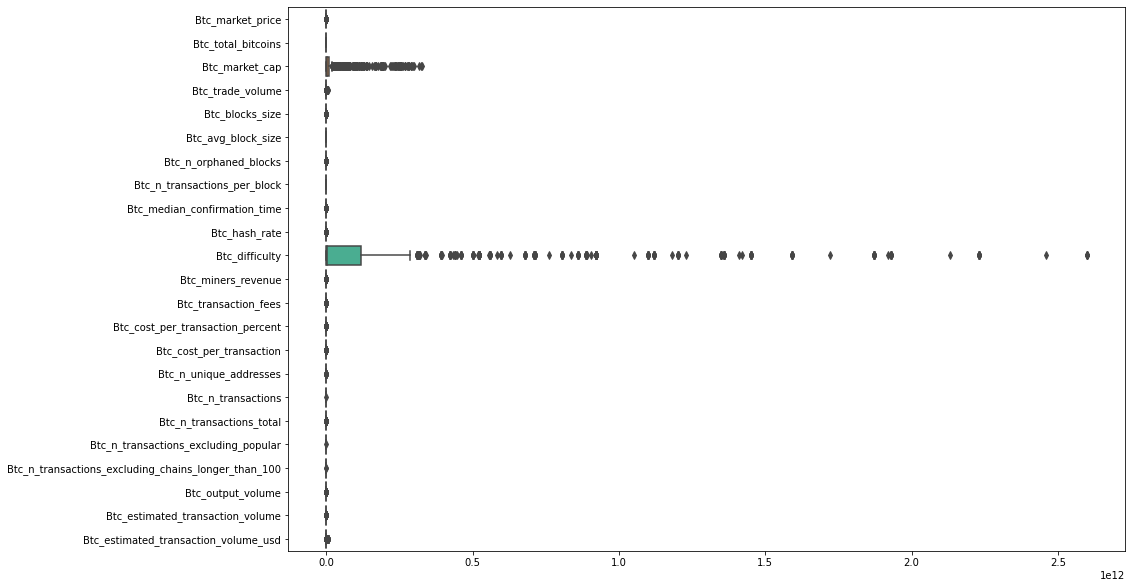

In [42]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient='h')
plt.show()

<AxesSubplot:>

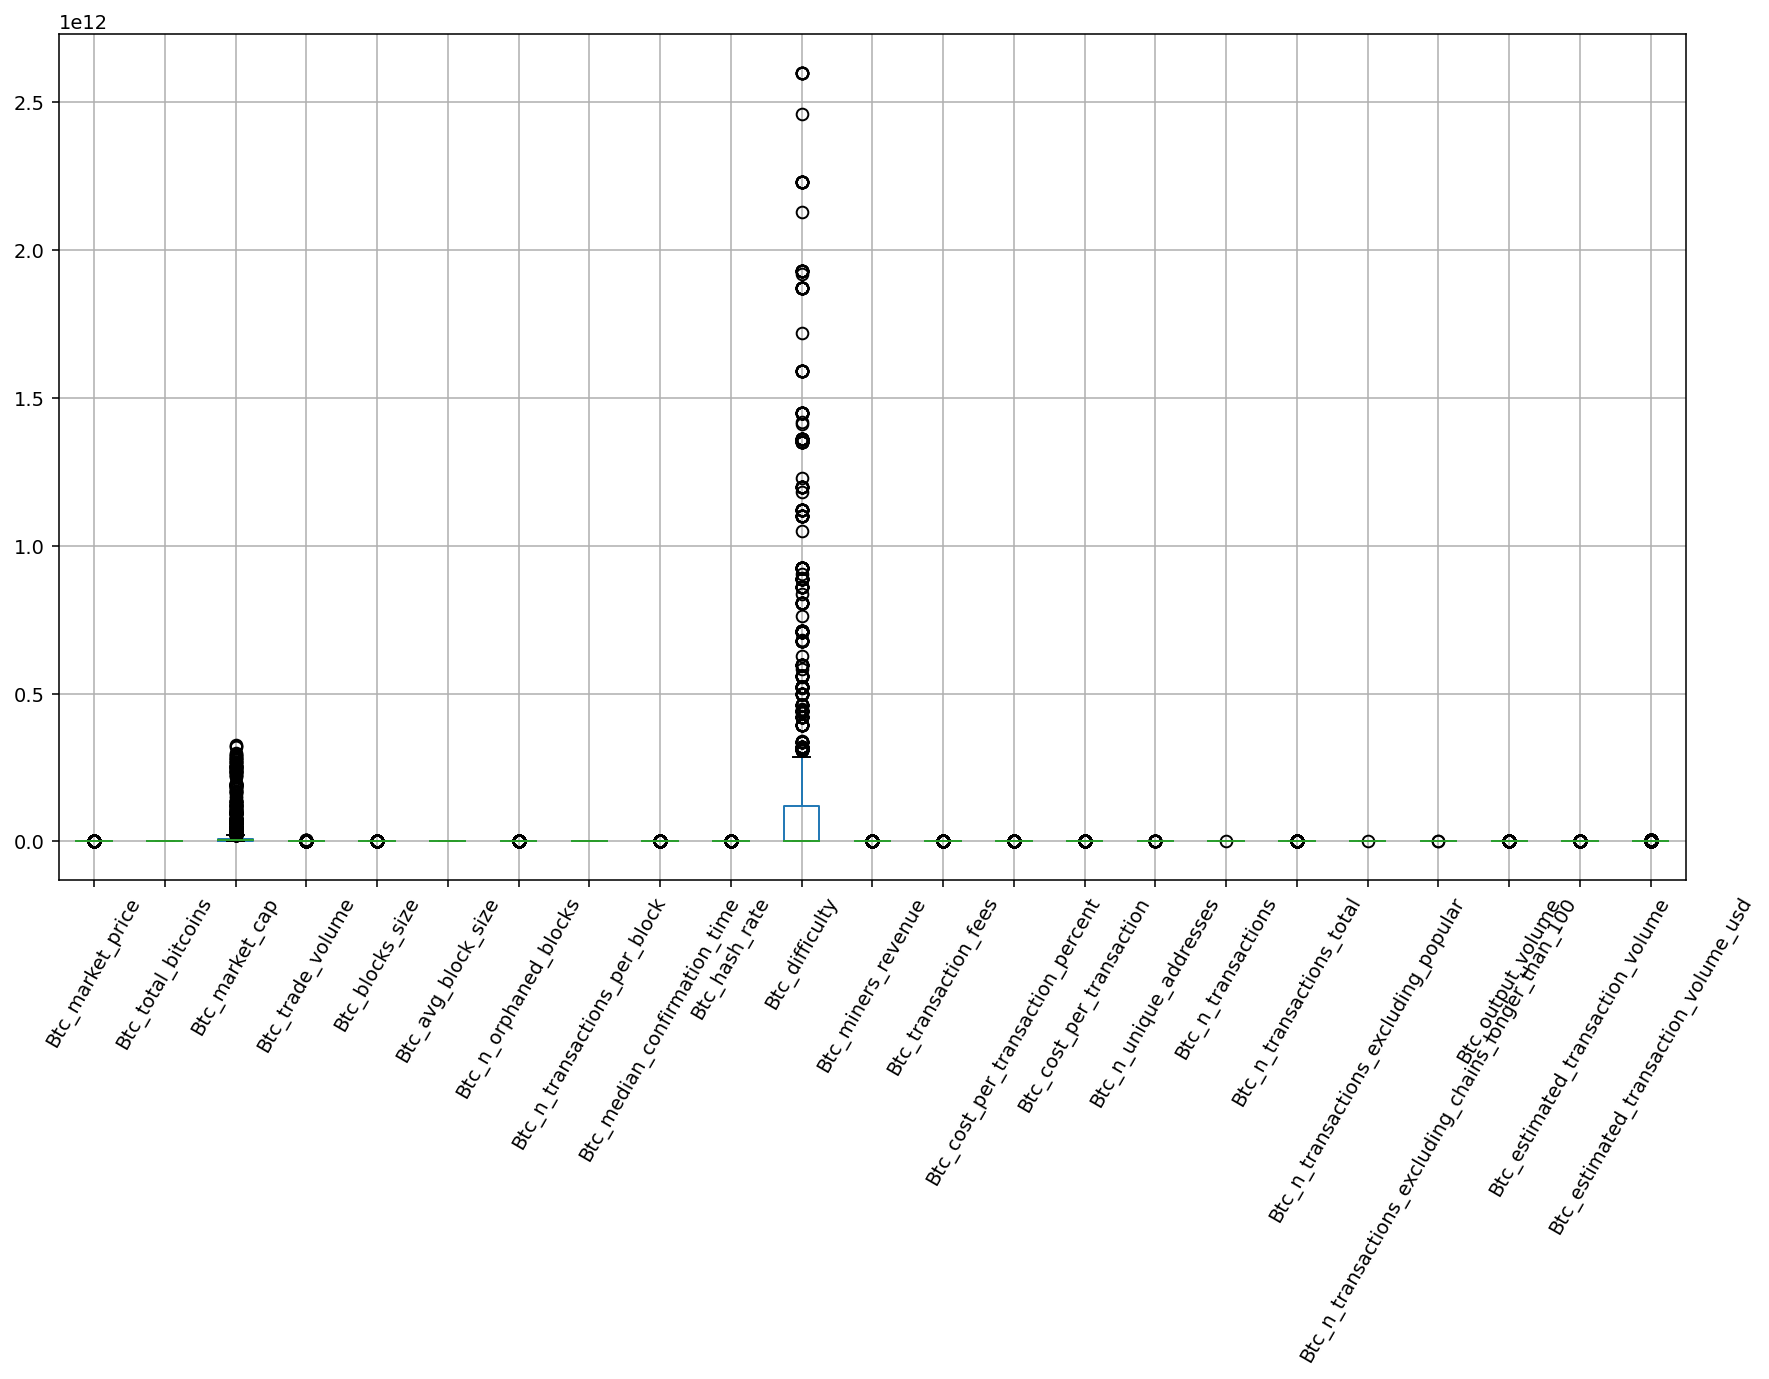

In [43]:
plt.figure(figsize = (15,8), dpi = 140)
df.boxplot(rot = 60)

***We see mainly the outliers are in Btc_market_cap and Btc_difficulty columns. Lets view them seperately***

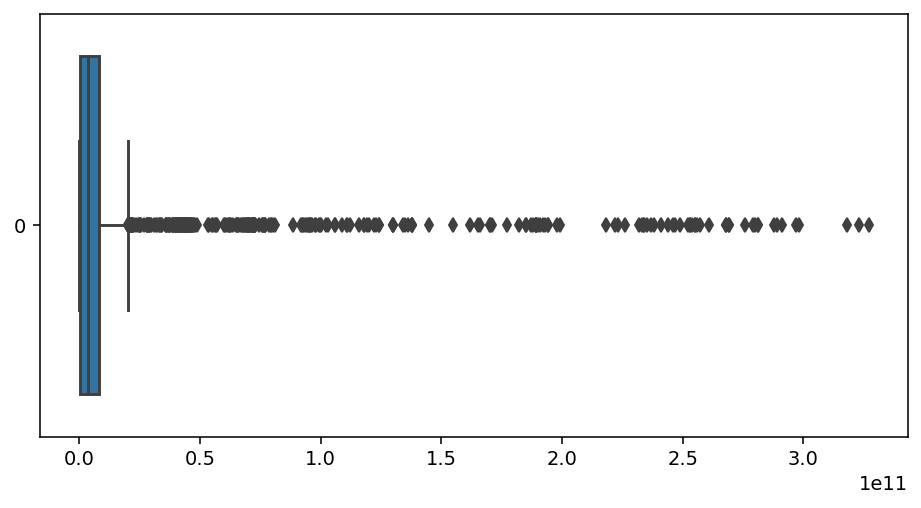

In [44]:
plt.figure(figsize=(8,4), dpi=140)
sns.boxplot(data = df['Btc_market_cap'], orient='h')
plt.show()

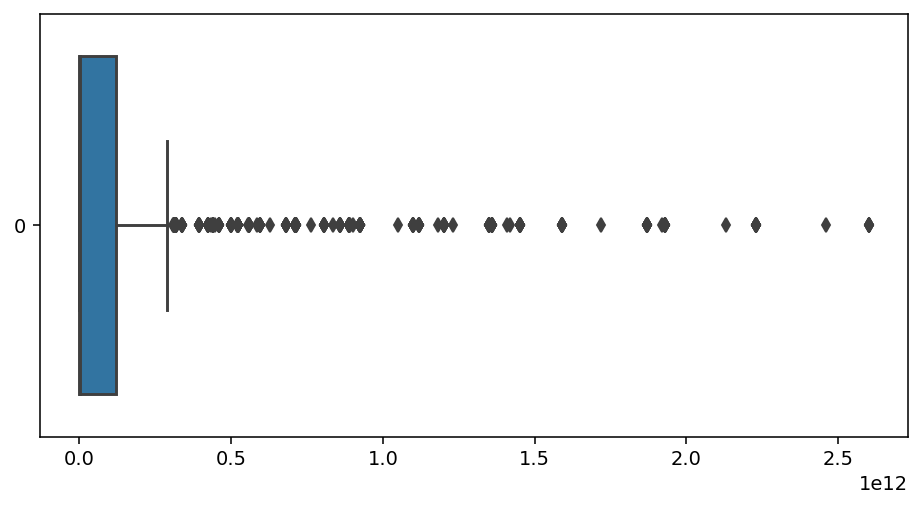

In [45]:
plt.figure(figsize=(8,4), dpi=140)
sns.boxplot(data = df['Btc_difficulty'], orient='h')
plt.show()

    Since the dataset is small lets ignore the outliers

## Feature selection techniques

In [46]:
df.columns

Index(['Date', 'Btc_market_price', 'Btc_total_bitcoins', 'Btc_market_cap',
       'Btc_trade_volume', 'Btc_blocks_size', 'Btc_avg_block_size',
       'Btc_n_orphaned_blocks', 'Btc_n_transactions_per_block',
       'Btc_median_confirmation_time', 'Btc_hash_rate', 'Btc_difficulty',
       'Btc_miners_revenue', 'Btc_transaction_fees',
       'Btc_cost_per_transaction_percent', 'Btc_cost_per_transaction',
       'Btc_n_unique_addresses', 'Btc_n_transactions',
       'Btc_n_transactions_total', 'Btc_n_transactions_excluding_popular',
       'Btc_n_transactions_excluding_chains_longer_than_100',
       'Btc_output_volume', 'Btc_estimated_transaction_volume',
       'Btc_estimated_transaction_volume_usd'],
      dtype='object')

In [47]:
# Normal co-relation map with the variables

corr = df.corr()

corr

,Btc_market_price,Btc_total_bitcoins,Btc_market_cap,Btc_trade_volume,Btc_blocks_size,Btc_avg_block_size,Btc_n_orphaned_blocks,Btc_n_transactions_per_block,Btc_median_confirmation_time,Btc_hash_rate,...,Btc_cost_per_transaction_percent,Btc_cost_per_transaction,Btc_n_unique_addresses,Btc_n_transactions,Btc_n_transactions_total,Btc_n_transactions_excluding_popular,Btc_n_transactions_excluding_chains_longer_than_100,Btc_output_volume,Btc_estimated_transaction_volume,Btc_estimated_transaction_volume_usd
Btc_market_price,1.000000,0.392234,0.999783,0.868608,0.674059,0.544033,-0.076400,0.544125,0.274080,0.920876,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
Btc_total_bitcoins,0.392234,1.000000,0.384352,0.285198,0.766657,0.847962,0.274684,0.828094,0.658824,0.488253,...,-0.079864,0.372531,0.817668,0.829480,0.780207,0.811923,0.797756,0.290604,0.211535,0.387700
Btc_market_cap,0.999783,0.384352,1.000000,0.869103,0.672455,0.541310,-0.080742,0.541702,0.270778,0.922073,...,-0.012923,0.805645,0.660720,0.566857,0.678081,0.555674,0.564791,0.112410,0.051356,0.968533
Btc_trade_volume,0.868608,0.285198,0.869103,1.000000,0.520380,0.415544,-0.068190,0.429755,0.215912,0.757893,...,-0.009456,0.690577,0.538936,0.453151,0.524986,0.441536,0.449220,0.097519,0.055996,0.895751
Btc_blocks_size,0.674059,0.766657,0.672455,0.520380,1.000000,0.952006,0.050816,0.942925,0.500374,0.825364,...,-0.030111,0.442065,0.962852,0.946392,0.996507,0.948315,0.957735,0.250611,0.151807,0.671983
Btc_avg_block_size,0.544033,0.847962,0.541310,0.415544,0.952006,1.000000,0.147514,0.977887,0.553085,0.687581,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
Btc_n_orphaned_blocks,-0.076400,0.274684,-0.080742,-0.068190,0.050816,0.147514,1.000000,0.114178,0.071608,-0.092103,...,-0.015803,0.009497,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944
Btc_n_transactions_per_block,0.544125,0.828094,0.541702,0.429755,0.942925,0.977887,0.114178,1.000000,0.557748,0.670598,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
Btc_median_confirmation_time,0.274080,0.658824,0.270778,0.215912,0.500374,0.553085,0.071608,0.557748,1.000000,0.341905,...,-0.055221,0.178618,0.511698,0.543757,0.507754,0.508925,0.532408,0.308576,0.217102,0.280985
Btc_hash_rate,0.920876,0.488253,0.922073,0.757893,0.825364,0.687581,-0.092103,0.670598,0.341905,1.000000,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864


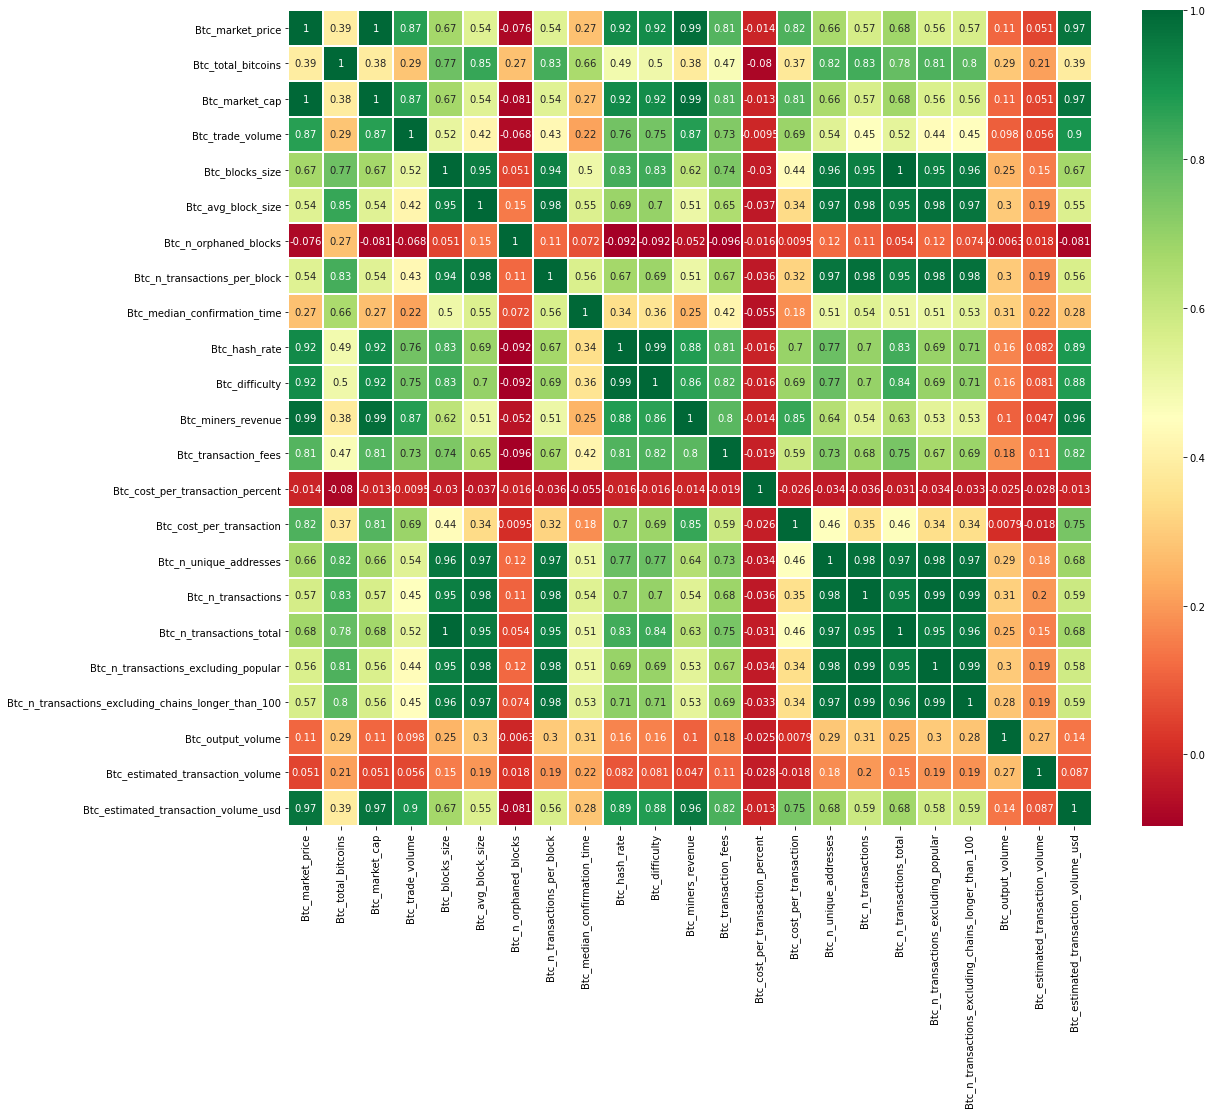

In [48]:
# Let's check the co-relation for each and every variable

plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=1, linecolor='white')
plt.show()

In [49]:
# Corelation with output variable
cor_target = corr['Btc_market_price']

In [50]:
# Selecting highly corelated features  
# Here setting the threshold value as 0.50 and -0.50

relevant_features = cor_target[(cor_target > 0.50) | (cor_target < -0.50)]

relevant_features

Btc_market_price                                       1.000000
Btc_market_cap                                         0.999783
Btc_trade_volume                                       0.868608
Btc_blocks_size                                        0.674059
Btc_avg_block_size                                     0.544033
Btc_n_transactions_per_block                           0.544125
Btc_hash_rate                                          0.920876
Btc_difficulty                                         0.916913
Btc_miners_revenue                                     0.986732
Btc_transaction_fees                                   0.806568
Btc_cost_per_transaction                               0.815507
Btc_n_unique_addresses                                 0.663917
Btc_n_transactions                                     0.569603
Btc_n_transactions_total                               0.680048
Btc_n_transactions_excluding_popular                   0.558416
Btc_n_transactions_excluding_chains_long

In [51]:
relevant_features.sort_values(ascending= False)

Btc_market_price                                       1.000000
Btc_market_cap                                         0.999783
Btc_miners_revenue                                     0.986732
Btc_estimated_transaction_volume_usd                   0.968308
Btc_hash_rate                                          0.920876
Btc_difficulty                                         0.916913
Btc_trade_volume                                       0.868608
Btc_cost_per_transaction                               0.815507
Btc_transaction_fees                                   0.806568
Btc_n_transactions_total                               0.680048
Btc_blocks_size                                        0.674059
Btc_n_unique_addresses                                 0.663917
Btc_n_transactions                                     0.569603
Btc_n_transactions_excluding_chains_longer_than_100    0.567281
Btc_n_transactions_excluding_popular                   0.558416
Btc_n_transactions_per_block            

***We see there is multi-colinearity between the independent features*** 

***As in the internship it has been mentioned to consider only these features :- 'Btc_market_cap','Btc_n_transactions','Btc_miners_revenue','Btc_cost_per_transaction','Btc_difficulty','Btc_hash_rate',
'Btc_cost_per_transaction_percent'***

***We are considering only these features***

## Lets view how the values are distributed in one shot

In [52]:
correlated_data = df[['Btc_market_cap','Btc_n_transactions','Btc_miners_revenue','Btc_cost_per_transaction',
        'Btc_difficulty','Btc_hash_rate', 'Btc_cost_per_transaction_percent','Btc_market_price']]

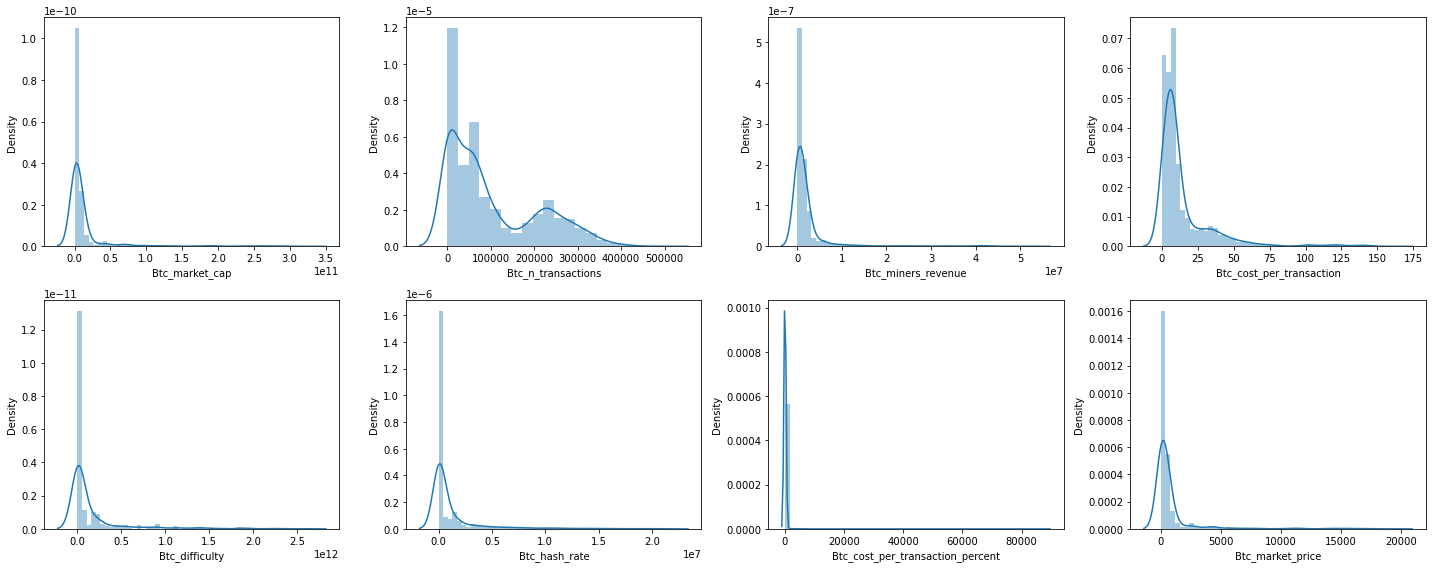

In [53]:
rows = 2
cols = 4

fig, ax = plt.subplots(nrows= rows, ncols=cols, figsize = (20,8))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(correlated_data[col[index]], ax= ax[i][j])
        index = index + 1
        
plt.tight_layout()

<Figure size 576x288 with 0 Axes>

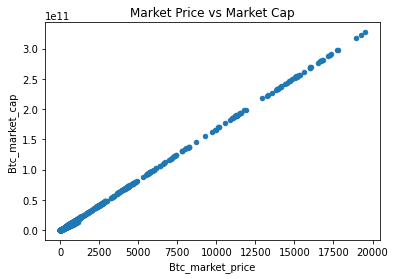

In [54]:
#Plotting with help of pandas built-in data visualisation
plt.figure(figsize=(8,4))
df.plot(kind='scatter',x='Btc_market_price',y='Btc_market_cap',title='Market Price vs Market Cap') 
plt.show()

<Figure size 576x288 with 0 Axes>

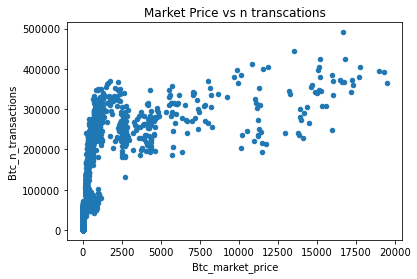

In [55]:
plt.figure(figsize=(8,4))
df.plot(kind='scatter',x='Btc_market_price',y='Btc_n_transactions',title='Market Price vs n transcations') 
plt.show()

<Figure size 576x288 with 0 Axes>

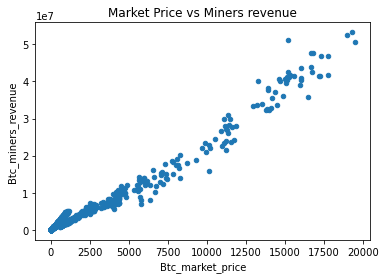

In [56]:
plt.figure(figsize=(8,4))
df.plot(kind='scatter',x='Btc_market_price',y='Btc_miners_revenue',title='Market Price vs Miners revenue') 
plt.show()

<Figure size 576x288 with 0 Axes>

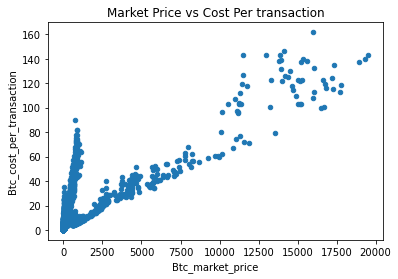

In [57]:
plt.figure(figsize=(8,4))
df.plot(kind='scatter',x='Btc_market_price',y='Btc_cost_per_transaction',title='Market Price vs Cost Per transaction') 
plt.show()

<Figure size 576x288 with 0 Axes>

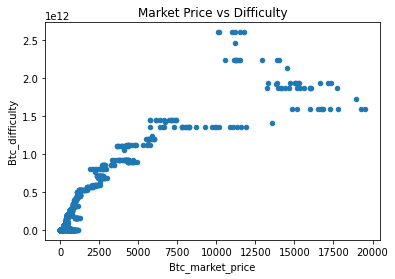

In [58]:
plt.figure(figsize=(8,4))
df.plot(kind='scatter',x='Btc_market_price',y='Btc_difficulty',title='Market Price vs Difficulty') 
plt.show()

<Figure size 576x288 with 0 Axes>

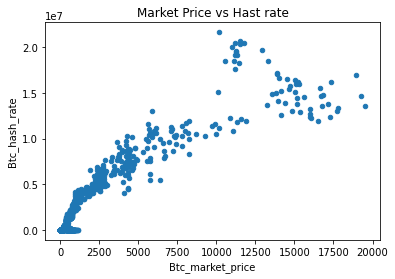

In [59]:
plt.figure(figsize=(8,4))
df.plot(kind='scatter',x='Btc_market_price',y='Btc_hash_rate',title='Market Price vs Hast rate') 
plt.show()

<Figure size 576x288 with 0 Axes>

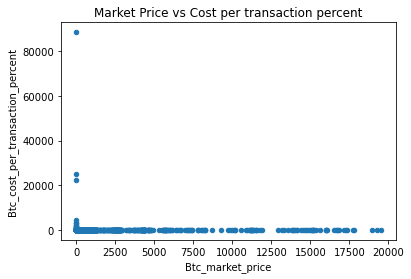

In [60]:
plt.figure(figsize=(8,4))
df.plot(kind='scatter',x='Btc_market_price',y='Btc_cost_per_transaction_percent',title='Market Price vs Cost per transaction percent') 
plt.show()

## Now dividing the columns into x and y

In [61]:
X = df[['Btc_market_cap','Btc_n_transactions','Btc_miners_revenue','Btc_cost_per_transaction',
        'Btc_difficulty','Btc_hash_rate', 'Btc_cost_per_transaction_percent']]

y = df['Btc_market_price']

In [62]:
X.head()

,Btc_market_cap,Btc_n_transactions,Btc_miners_revenue,Btc_cost_per_transaction,Btc_difficulty,Btc_hash_rate,Btc_cost_per_transaction_percent
0,0.0,244,0.0,0.0,2.527738,0.000029,31.781022
1,0.0,235,0.0,0.0,2.527738,0.000029,154.463801
2,0.0,183,0.0,0.0,2.527738,0.000023,1278.516635
3,0.0,224,0.0,0.0,2.527738,0.000028,22186.687990
4,0.0,218,0.0,0.0,2.527738,0.000027,689.179876


In [63]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Btc_market_price, dtype: float64

## Now splitting the data into training and testing data¶

In [64]:
# Now splitting the data into training and testing data

from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [66]:
X_train.shape

(1947, 7)

In [67]:
X_test.shape

(959, 7)

In [68]:
y_train.shape

(1947,)

In [69]:
y_test.shape

(959,)

## Now fitting multiple linear regression with training dataset.

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
lr = LinearRegression()

lr

LinearRegression()

In [72]:
lr.fit(X_train,y_train)

LinearRegression()

## Calculating Constants of Regression Line

In [73]:
slope = lr.coef_

In [74]:
intercept=lr.intercept_

In [75]:
print(slope)
print(intercept)

[ 5.92472086e-08  2.77566173e-04 -6.59189101e-06  3.70839523e+00
 -2.27012876e-11 -7.30755994e-06  2.30347532e-04]
-12.669974483580859


## Now predicting the test results for training dataset.

In [76]:
y_train_pred = lr.predict(X_train)

In [77]:
score = r2_score(y_train,y_train_pred)

mse = mean_squared_error(y_train,y_train_pred)

rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))

In [78]:
print('The model performance for training dataset')
print('----'*23)
print('R2_score is {}'.format(score),'\n')
print('MSE is {}'.format(mse),'\n')
print('RMSE is {}'.format(rmse))

The model performance for training dataset
--------------------------------------------------------------------------------------------
R2_score is 0.999929149802545 

MSE is 400.2276745006619 

RMSE is 20.005691052814495


## Now predicting the test results for testing dataset

In [79]:
y_test_pred = lr.predict(X_test)

In [80]:
score = r2_score(y_test,y_test_pred)

mse = mean_squared_error(y_test,y_test_pred)

rmse = (np.sqrt(mean_squared_error(y_test,y_test_pred)))

In [81]:
print('The model performance for testing dataset')
print('---'*23)
print('R2_score is {}'.format(score),'\n')
print('MSE is {}'.format(mse),'\n')
print('RMSE is {}'.format(rmse))

The model performance for testing dataset
---------------------------------------------------------------------
R2_score is 0.9999079900608031 

MSE is 425.3373408962575 

RMSE is 20.623708223698703


## Comparing Actual Vs Predicted

In [82]:
de=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})

de.head(10)

,Actual,Predicted
141,0.000000,-12.562346
1208,98.470450,96.409661
486,17.200000,49.962633
1720,325.810000,314.975449
1740,362.990000,351.183899
2592,941.919714,949.267690
1456,667.010000,640.653241
1228,95.853010,96.977900
1010,12.430000,13.827056
679,4.188880,13.939742


In [83]:
print(slope)
print(intercept)

[ 5.92472086e-08  2.77566173e-04 -6.59189101e-06  3.70839523e+00
 -2.27012876e-11 -7.30755994e-06  2.30347532e-04]
-12.669974483580859


In [84]:
X = df[['Btc_market_cap','Btc_n_transactions','Btc_miners_revenue','Btc_cost_per_transaction',
        'Btc_difficulty','Btc_hash_rate', 'Btc_cost_per_transaction_percent']]

    Btc_market_price = (-12.669974483580859) + (Btc_market_cap coef)*X1 + (Btc_n_transactions coef)*X2 
                    + (Btc_miners_revenue coef)*X3 + (Btc_cost_per_transaction coef)*X4 + (Btc_difficulty coef)*X5 + 
                    (Btc_hash_rate coef)*X6 + (Btc_cost_per_transaction_percent coef)*X7

    Btc_market_price =  (-12.669974483580859) + (5.92472086e-08)*X1 + (2.77566173e-04)*X2 
                + (-6.59189101e-06)*X3 + (3.70839523e+00)*X4 + (-2.27012876e-11)*X5 + 
                (-7.30755994e-06)*X6 + (2.30347532e-04)*X7

## Lets also predict using statsmodel

In [85]:
import statsmodels.api as sm

In [86]:
X = sm.add_constant(X)   # adding constant

In [87]:
model = sm.OLS(y, X).fit()

In [88]:
predictions = model.predict(X)

In [89]:
print_model = model.summary()

In [90]:
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Btc_market_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.407e+06
Date:                Wed, 20 Jan 2021   Prob (F-statistic):               0.00
Time:                        07:39:42   Log-Likelihood:                -12853.
No. Observations:                2906   AIC:                         2.572e+04
Df Residuals:                    2898   BIC:                         2.577e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

***Here the intercept is -13.2314***